This is a not downloaded from course notebook

In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Math

### Computing limits of a function

In [2]:
x = sym.symbols('x')

fx = x**3

lim_pnt = 1.5
lim = sym.limit(fx, x, lim_pnt)
display(Math('\\lim_{x\\to %g} %s = %g' % (lim_pnt, sym.latex(fx), lim)))

<IPython.core.display.Math object>

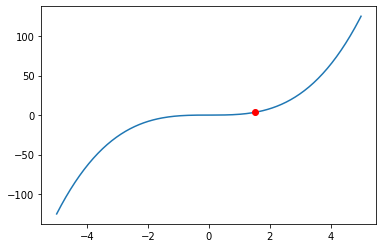

In [3]:
fxx = sym.lambdify(x, fx)
xx = np.linspace(-5, 5, 200)

plt.plot(xx, fxx(xx))
plt.plot(lim_pnt, lim, 'ro')

<IPython.core.display.Math object>

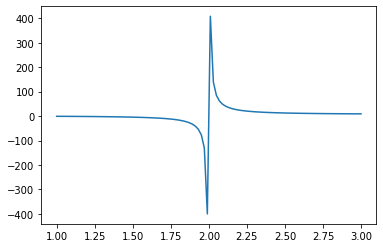

In [4]:
fx = (x**2)/(x-2)
fxx = sym.lambdify(x, fx)
xx = np.linspace(1, 3, 102)

lim_pnt = 2
lim = sym.limit(fx, x, lim_pnt, dir='-')

plt.plot(xx, fxx(xx))
display(Math('\\lim_{x\\to %g^-} %s = %g' % (lim_pnt, sym.latex(fx), lim)))

### Exercise - Limits
#### 1 - Implement and plot
$$
f(x) = e^-x\sqrt{x+1}
$$

$$
g(x) = \cos(x + \sin(x))
$$

#### 2 -  Prove limits property
$$
\frac{\lim_{x\to5}f(x)}{\lim_{x\to5}g(x)} = \lim_{x\to5}\frac{f(x)}{g(x)}
$$

In [5]:
x = sym.symbols('x')
xx = np.linspace(-0, 10, 100)

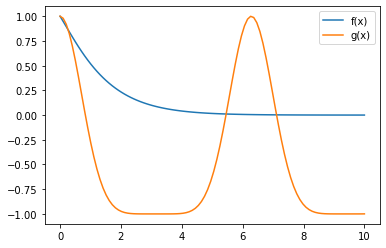

In [6]:
fx = sym.exp(-x)*(sym.sqrt(x+1))
fxx = sym.lambdify(x, fx)
gx = sym.cos(x + sym.sin(x))
gxx = sym.lambdify(x, gx)

plt.plot(xx, fxx(xx), label='f(x)')
plt.plot(xx, gxx(xx), label='g(x)')
plt.legend()
plt.show()

In [7]:
# Left part of the property
lim_pnt = 5
res_fx = sym.limit(fx, x, lim_pnt)
res_gx = sym.limit(gx, x, lim_pnt)

In [8]:
# Right part of the property
fgx = fx/gx
res_fgx = sym.limit(fgx, x, lim_pnt)

# Checking the property
print(res_fx/res_gx == res_fgx)

True


### Piecewise functions

In [9]:
from sympy.abc import x

piece1 = 0
piece2 = -2*x
piece3 = x**3/10

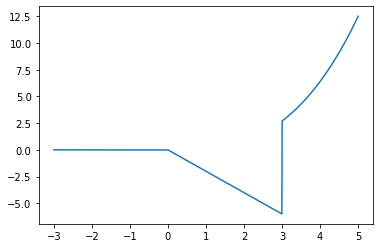

In [10]:
fx = sym.Piecewise((piece1, x<0), (piece2, (x>=0) & (x<3)), (piece3, x>=3))
fxx = sym.lambdify(x, fx)
xx = np.linspace(-3, 5, 1234)

plt.plot(xx, fxx(xx))
plt.show()

### Exercise - Piecewise functions

<IPython.core.display.Math object>

<string>:2: RuntimeWarning: invalid value encountered in log


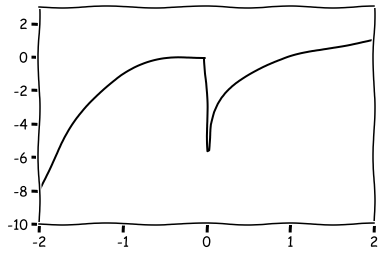

In [11]:
fx = sym.Piecewise((x**3, x<=0), (sym.log(x, 2), True))

display(Math('f(x) = ' + sym.latex(fx)))

fxx = sym.lambdify(x, fx)
xx = np.linspace(-2, 2, 100)

with plt.xkcd():
    plt.plot(xx, fxx(xx), 'k')
    plt.axis([-2, 2, -10, 3])
    plt.show()

### Derivatives of polynomians

In [12]:
x = sym.symbols('x')

fx = x**2
dfx = sym.diff(fx)

In [13]:
print('Leibniz notation:')
display(Math('f(x) = %s, \\quad \\frac{df}{dx}=%s' % (sym.latex(fx), sym.latex(dfx))))

print('\nLagrange notation:')
display(Math('f(x) = %s, \\quad f\'=%s' % (sym.latex(fx), sym.latex(dfx))))

print('\nNewton notation:')
display(Math('f(x) = %s, \\quad \\dot{f}=%s' % (sym.latex(fx), sym.latex(dfx))))

Leibniz notation:


<IPython.core.display.Math object>


Lagrange notation:


<IPython.core.display.Math object>


Newton notation:


<IPython.core.display.Math object>

In [14]:
import sympy.plotting.plot as symplot

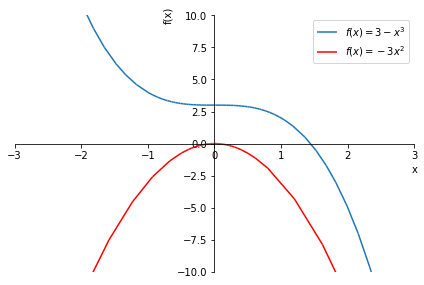

In [15]:
fx = 3 - x**3

p = symplot(fx, (x, -5, 5), show=False)
p.extend(symplot(sym.diff(fx), show=False))
p[1].line_color = 'r'
p[0].label = '$f(x) = %s$' % sym.latex(fx)
p[1].label = '$f(x) = %s$' % sym.latex(sym.diff(fx))
p.legend = True
p.ylim = [-10, 10]
p.xlim = [-3, 3]
p.show()

### Exercise -  Derivatives of polynomians
Demonstrate "product rule" and "summation rule" of derivatives

In [16]:
fx = 3 + 2*x - 5*x**2 + 7*x**4
gx = 4*x**2 + x**5

In [17]:
sym.diff(fx + gx) == sym.diff(fx) + sym.diff(gx)

True

In [18]:
sym.diff(fx * gx) == sym.diff(fx) * sym.diff(gx)

False

In [19]:
sym.diff(fx*gx) == sym.diff(fx)*gx + sym.diff(gx)*fx

True

### Derivatives of trig. functions

In [20]:
q = sym.symbols('q')

print(sym.diff(sym.cos(q)))
print(sym.diff(sym.sin(q)))

-sin(q)
cos(q)


In [21]:
f = sym.cos(q)

for i in range(0, 8):
    display(Math('\\frac{d}{dx}%s = %s' % (sym.latex(f), sym.latex(sym.diff(f)))))
    f = sym.diff(f)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

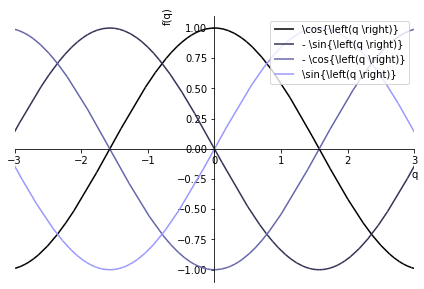

In [22]:
f = sym.cos(q)


for i in range(0, 4):
    if i==0:
        p = symplot(f, show=False, label=sym.latex(f), line_color=(i/5, i/5, i/3))
    else:
        p.extend(symplot(f, show=False, label=sym.latex(f),  line_color=(i/5, i/5, i/3)))
    f = sym.diff(f)

p.legend = True
p.xlim = [-3, 3]
p.show()

### Exercise - Derivatives of trig. functions

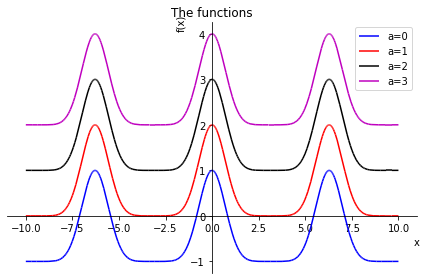

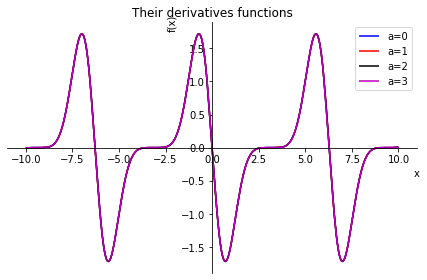

In [23]:
x, a = sym.symbols('x,a')
f = sym.cos(x + sym.sin(x)) + a
colors='brkm'

for ai in range(4):
    if ai == 0:
        p = symplot(f.subs(a, ai), show=False, label='a='+ str(ai), line_color=colors[ai])
    else:
        p.extend(symplot(f.subs(a, ai), show=False, label='a='+ str(ai), line_color=colors[ai]))
p.title = 'The functions'
p.legend = True
p.show()


for ai in range(4):
    if ai == 0:
        p = symplot(sym.diff(f.subs(a, ai)), show=False, label='a='+ str(ai), line_color=colors[ai])
    else:
        p.extend(symplot(sym.diff(f.subs(a, ai)), show=False, label='a='+ str(ai), line_color=colors[ai]))
p.title = 'Their derivatives functions'
p.legend = True
p.show()

### Tangent lines in a function

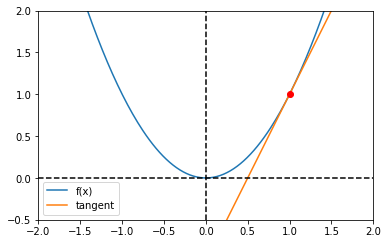

In [24]:
x = sym.symbols('x')

# define the function and its derivative
f = x**2
df = sym.diff(f)

# value at which to compute the tangent line
xa = 1

# get the function and derivative value at x_a
fa = f.subs(x, xa)
dfa = df.subs(x, xa)

xx = np.linspace(-2, 2, 200)
f_fun = sym.lambdify(x, f)(xx)
df_fun = sym.lambdify(x, df)(xx)

# compute the tangent line
tanline = dfa * (xx-xa) + fa

plt.plot(xx, f_fun, label='f(x)')
plt.plot(xx, tanline, label='tangent')
plt.plot(xa, fa, 'ro')

plt.axis('square')
plt.axis([-2, 2, -.5, 2])

ax = plt.gca()
plt.plot(ax.get_xlim(), [0, 0], 'k--')
plt.plot([0, 0], ax.get_ylim(), 'k--')
plt.legend()
plt.show()

### Exercise Tangent lines in a function
- Create a tangent function
- Make a plot with tangents of x²

In [25]:
def get_tangent(f, xa, bounds):
    df = sym.diff(f)

    fa = f.subs(x, xa)
    dfa = df.subs(x, xa)

    xx = np.linspace(*bounds, 200)
    return dfa * (xx-xa) + fa


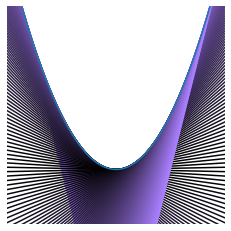

In [26]:
xx = np.linspace(-2, 2, 200)
f = x**2
ffun = sym.lambdify(x, f)(xx)

for a in xx:
    tang = get_tangent(f, a, (-2, 2))
    plt.plot(xx, tang, color=[abs(a)/3, abs(a)/4, abs(a)/2])

plt.plot(xx, ffun)
plt.axis('square')
plt.axis([-2, 2, -1, 3])
plt.axis('off')
plt.show()

### Finding Critical points

In [27]:
from scipy.signal import find_peaks

The critical points are [-1.  1.] [0.]


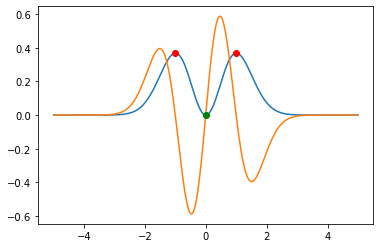

In [28]:
# empirical method
x = np.linspace(-5, 5, 1001)
fx = x**2 * np.exp(-x**2)
dfx = np.diff(fx)/(x[1]-x[0])


localmax = find_peaks(fx)[0]
localmin = find_peaks(-fx)[0]

print('The critical points are ' + str(x[localmax]) + ' ' + str(x[localmin]))

plt.plot(x, fx)
plt.plot(x[:-1], dfx)

plt.plot(x[localmax], fx[localmax], 'ro')
plt.plot(x[localmin], fx[localmin], 'go')
plt.show()

In [29]:
x = sym.symbols('x')
fx = x**2 * sym.exp(-x**2)


dfx = sym.diff(fx)
crit_points = sym.solve(dfx)
crit_points

[-1, 0, 1]

### Exercise - Critical points

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

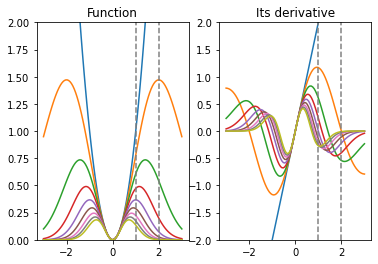

In [30]:
x, a = sym.symbols('x, a')

base_expr = x**2*sym.exp(-a*x**2)

list_a = np.arange(0, 2.25, 0.25)
xx = np.linspace(-3, 3, 100)

fig, ax = plt.subplots(1, 2)

for la in list_a:
    fx = base_expr.subs(a, la)
    dfx = sym.diff(fx)
    crit_points = sym.solve(dfx)

    # plotting
    ax[0].plot(xx, sym.lambdify(x, fx)(xx))
    ax[1].plot(xx, sym.lambdify(x, dfx)(xx))

    if 1 in crit_points:
        display(Math('\\Rightarrow %s \\text{ has a critical point at x=1 }' % sym.latex(fx)))
    elif 2 in crit_points:
        display(Math('\\Rightarrow %s \\text{ has a critical point at x=2 }' % sym.latex(fx)))
    else:
        display(Math('\\Rightarrow %s \\text{ has NO critical points at x=1 or x=2 }' % sym.latex(fx)))

ax[0].set_ylim([0, 2])
ax[0].set_title('Function')
ax[0].plot([1, 1], [0, 2], '--', color='grey')
ax[0].plot([2, 2], [0, 2], '--', color='grey')

ax[1].set_ylim([-2, 2])
ax[1].set_title('Its derivative')
ax[1].plot([1, 1], [-2, 2], '--', color='grey')
ax[1].plot([2, 2], [-2, 2], '--', color='grey')

plt.show()

### Partial Derivatives

In [31]:
from sympy.abc import x, y

f = x**2 + x*y**2

display(Math('\\frac{\\partial f}{\\partial x} = %s' % sym.latex(sym.diff(f, x))))
display(Math('\\frac{\\partial f}{\\partial y} = %s' % sym.latex(sym.diff(f, y))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

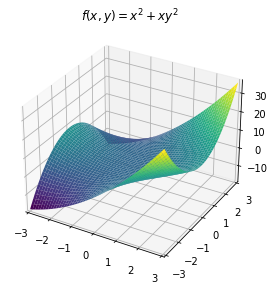

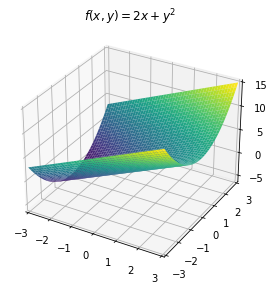

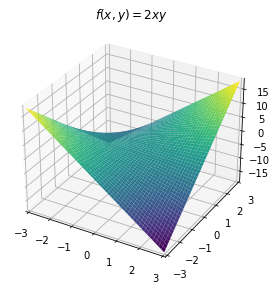

In [32]:
p = sym.plotting.plot3d(f, (x, -3, 3), (y, -3, 3), title='$f(x, y)=%s$' % sym.latex(f))
p = sym.plotting.plot3d(sym.diff(f, x), (x, -3, 3), (y, -3, 3), title='$f(x, y)=%s$' % sym.latex(sym.diff(f, x)))
p = sym.plotting.plot3d(sym.diff(f, y), (x, -3, 3), (y, -3, 3), title='$f(x, y)=%s$' % sym.latex(sym.diff(f, y)))

### Indefinite and definite integrals

x**2/2


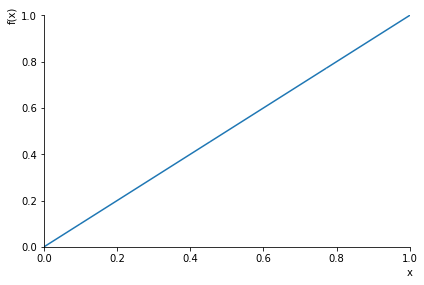

In [33]:
x = sym.symbols('x')

f = x

print(sym.integrate(f))
p = sym.plotting.plot(f, show=False)
p.xlim = [0, 1]
p.ylim = [0, 1]

p.show()

In [34]:
sym.integrate(f, (x, 0, 1))

1/2

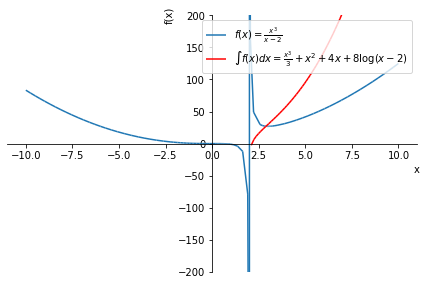

In [35]:
f = x**3 / (x-2)
intf = sym.integrate(f)
p = sym.plotting.plot(f, show=False)
p.extend(sym.plotting.plot(intf, (x, 2.1, 10), show=False, line_color='r'))

p[0].label = '$f(x) = %s$' % (sym.latex(f))
p[1].label = '$\\int f(x) dx = %s$' % (sym.latex(intf))

p.ylim = [-200, 200]
p.legend = True
p.show()

### Exercies
Prove
$
\int{f(x)'dx} = f(x)
$

for
$f(x) = 2x^3 + \sin(x)$


In [36]:
x = sym.symbols('x')
fx = 2*x**3 + sym.sin(x)
fx

2*x**3 + sin(x)

In [37]:
sym.integrate(sym.diff(fx)) == fx

True

### Area between two curves

In [38]:
from matplotlib.patches import Polygon

In [39]:
x = sym.symbols('x')

symf = x**2
symg = x

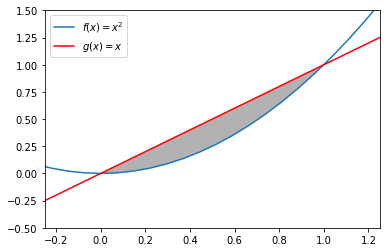

In [40]:
f = sym.lambdify(x, symf)
g = sym.lambdify(x, symg)

xx = np.linspace(-2, 2, 55)

# add patch
xpatch = np.linspace(0, 1, 100)
ypatch = np.vstack((g(xpatch), f(xpatch))).T

fig, ax = plt.subplots()
ax.add_patch(Polygon(ypatch, facecolor='k', alpha=.3))

plt.plot(xx, f(xx))
plt.plot(xx, g(xx), 'r')

plt.legend(['$f(x)=%s$' % sym.latex(symf),
           '$g(x)=%s$' % sym.latex(symg),])
plt.axis([-.25, 1.25, -.5, 1.5])


plt.show()

### Exercise - Area between two curves

#### Computing the area between two functions
The area between two functions is given by the formula $A = \int_{a}^{b}{f(x)} - g(x)dx$

In our example, $f(x) = x^2$ and $g(x) = x$

Therefore, $A = \int_{a}^{b}{(x^2 - x)}dx$

We will compute the area between the two crossing points, that is, where the two functions are equal. This is given by the two solutions to the equation
$$
x^2 = x
$$

The two solutions are $x = 0$ and $x = 1$. This gives us the definite integral of

$$
A = \int_{0}^{1}{(x^2 - x)dx}
$$
The final answer will be given in the code below.

In [41]:
x = sym.symbols('x')

symf = x**2
symg = x

fg_intersect = sym.solve(symf-symg)
display(Math('f(x)\\text{ and } g(x) \\text{ intersect at }x= %g \\text{ and } %g' % (fg_intersect[0], fg_intersect[1])))

# compute the area
A = sym.integrate(symg - symf, (x, fg_intersect[0], fg_intersect[1]))

display(Math('\\text{The area between these functions is } %s' % A))



<IPython.core.display.Math object>

<IPython.core.display.Math object>